# QASPER Dataset Analysis



This notebook analyzes the QASPER dataset which par is used for the master's thesis on "The impact of text chunking methods on information retrieval quality in RAG systems" ("Утицај метода парчања текста на квалитет добављања информација у RAG системима").



## Overview



The QASPER dataset is a question answering dataset for scientific papers. It contains questions about scientific papers, along with answers and evidence spans from the papers. This makes it particularly suitable for evaluating RAG systems and chunking methods.

### 1. Import Libraries

In [1]:
# Import necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import random
from datasets import load_dataset

### 2. Load QASPER Dataset
Loads the QASPER dataset (combining train, validation, and test splits) and prints a confirmation

In [2]:
# Load QASPER dataset (train+validation+test)
print("Loading QASPER dataset...")
qasper = load_dataset("allenai/qasper", split="train+validation+test")
print("Dataset loaded successfully.\n")

Loading QASPER dataset...
Dataset loaded successfully.



### 3. Basic Overview of Each Paper
Calculates basic statistics for each paper such as number of sections, total paragraphs, average words per paragraph, total words, and number of questions. It then creates a DataFrame and prints descriptive statistics.

In [3]:
# Analysis 1: Basic overview of each paper
def avg_word_count(paragraphs_list):
    # Calculate the average word count per paragraph
    word_counts = [len(para.split()) for section in paragraphs_list for para in section]
    return sum(word_counts) / len(word_counts) if word_counts else 0

basic_summary = []
for item in qasper:
    paper_id = item.get('id', '')
    title = item.get('title', '')
    abstract = item.get('abstract', '')
    
    full_text = item.get('full_text', {})
    section_names = full_text.get('section_name', [])
    paragraphs = full_text.get('paragraphs', [])
    num_sections = len(section_names)
    total_paragraphs = sum(len(sec) for sec in paragraphs)
    avg_words = avg_word_count(paragraphs)
    total_words = sum(len(para.split()) for sec in paragraphs for para in sec)
    
    qas = item.get('qas', {})
    questions = qas.get('question', [])
    num_questions = len(questions)
    
    basic_summary.append({
        'id': paper_id,
        'title': title,
        'abstract': abstract,
        'num_sections': num_sections,
        'total_paragraphs': total_paragraphs,
        'avg_words_per_paragraph': avg_words,
        'total_words': total_words,
        'num_questions': num_questions
    })

df_basic = pd.DataFrame(basic_summary)
print("Basic overview created for", len(df_basic), "papers.")

# Calculate descriptive statistics (for console output)
descriptive_stats = df_basic[['num_sections', 'total_paragraphs', 'avg_words_per_paragraph', 'total_words', 'num_questions']].describe()
print("\nDescriptive statistics for basic measures:")
print(descriptive_stats)

Basic overview created for 1585 papers.

Descriptive statistics for basic measures:
       num_sections  total_paragraphs  avg_words_per_paragraph   total_words  \
count   1585.000000       1585.000000              1585.000000   1585.000000   
mean      13.822713         51.420820                75.910690   3572.845426   
std        6.263026         38.126387                23.541993   2085.704640   
min        0.000000          0.000000                 0.000000      0.000000   
25%       10.000000         30.000000                60.120690   2279.000000   
50%       13.000000         45.000000                72.842105   3401.000000   
75%       17.000000         62.000000                88.850000   4223.000000   
max       49.000000        644.000000               189.775000  25891.000000   

       num_questions  
count    1585.000000  
mean        3.185489  
std         1.711419  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max        

### 4. Visualization of Basic Measures
Generates histograms for the number of questions per paper and for the total number of words per paper. (Note: The plot titles and axis labels are in Cyrillic.)

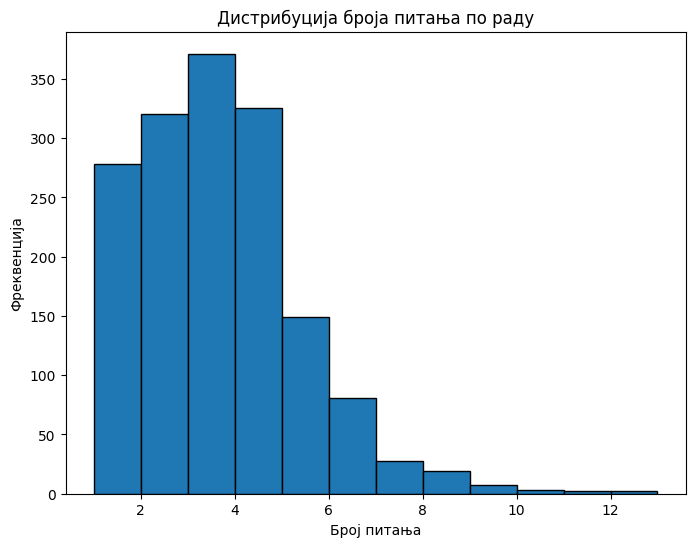

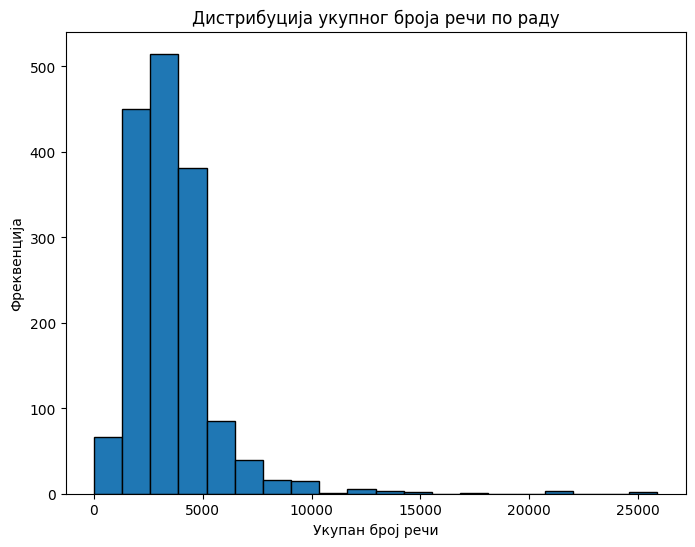

In [4]:
# %% Analysis 2: Visualization of basic measures
plt.figure(figsize=(8, 6))
plt.hist(df_basic['num_questions'], bins=range(int(df_basic['num_questions'].min()), int(df_basic['num_questions'].max())+2), edgecolor='black')
plt.title("Дистрибуција броја питања по раду")  
plt.xlabel("Број питања") 
plt.ylabel("Фреквенција") 
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_basic['total_words'], bins=20, edgecolor='black')
plt.title("Дистрибуција укупног броја речи по раду")
plt.xlabel("Укупан број речи") 
plt.ylabel("Фреквенција")  
plt.show()

### 5. Repeated Questions Analysis
Counts how many times each question appears across papers, then prints out the repeated and unique questions.

In [5]:
# Analysis 3: Repeated questions analysis
question_counter = collections.Counter()
for paper in qasper:
    questions = paper.get('qas', {}).get('question', [])
    unique_questions = set(questions)
    for q in unique_questions:
        question_counter[q] += 1

# Questions repeated in multiple papers
repeated_questions = {q: count for q, count in question_counter.items() if count > 1}
sorted_repeated = sorted(repeated_questions.items(), key=lambda x: x[1], reverse=True)
print(f"\nNumber of repeated questions: {len(sorted_repeated)}")
print("Questions and number of papers in which they appear:")
for q, count in sorted_repeated:
    print(f"{q} : {count}")

# Unique (non-repeated) questions
unique_questions_only = {q: count for q, count in question_counter.items() if count == 1}
print(f"\nNumber of unique questions: {len(unique_questions_only)}")
print("Unique questions:")
for q in unique_questions_only:
    print(q)


Number of repeated questions: 145
Questions and number of papers in which they appear:
Do they report results only on English data? : 36
Which dataset do they use? : 18
What is the size of the dataset? : 14
what was the baseline? : 13
What was the baseline? : 12
What datasets are used? : 12
What are the baselines? : 12
Do they evaluate only on English datasets? : 10
What dataset do they use? : 10
what are the baselines? : 10
what dataset was used? : 10
what datasets were used? : 9
What is the baseline? : 9
What datasets did they use? : 9
What dataset did they use? : 9
How long is the dataset? : 9
How large is the dataset? : 8
What were the baselines? : 8
What dataset is used? : 7
what were the baselines? : 7
What are the baseline models? : 7
What metrics are used for evaluation? : 7
How big is the dataset? : 6
Do they report results only on English datasets? : 6
How was the dataset collected? : 6
What evaluation metrics are used? : 6
What baseline model is used? : 6
what datasets did 

### 6. Detailed QAS Analysis
Performs a detailed analysis by calculating paragraph statistics (average, max, min, total words), evidence chunks, and free-form answer lengths. It also collects valid Q&A examples from the dataset.

In [6]:
# Analysis 4: Detailed QAS analysis (paragraphs, evidence chunks, free form answer length)
def paragraph_word_stats(paragraphs_list):
    # Calculate average, max, min, and total word counts for paragraphs
    word_counts = [len(para.split()) for section in paragraphs_list for para in section]
    if word_counts:
        return np.mean(word_counts), np.max(word_counts), np.min(word_counts), np.sum(word_counts)
    return 0, 0, 0, 0

detailed_summary = []
example_data = []  # To store valid examples of Q&A

for paper in qasper:
    paper_id = paper.get("id", "")
    title = paper.get("title", "")
    
    # Paragraph analysis
    full_text = paper.get("full_text", {})
    paragraphs = full_text.get("paragraphs", [])
    avg_para_len, max_para_len, min_para_len, total_words = paragraph_word_stats(paragraphs)
    num_paragraphs = sum(len(section) for section in paragraphs)
    
    # QAS analysis
    qas_obj = paper.get("qas", {})
    questions = qas_obj.get("question", [])
    num_questions = len(questions)
    
    total_evidence_counts = []
    total_free_form_lengths = []
    questions_data = []
    answers_list = qas_obj.get("answers", [])
    
    # Iterate through each question and its corresponding answer
    for question, answer_item in zip(questions, answers_list):
        if answer_item and isinstance(answer_item, dict) and "answer" in answer_item:
            for ans in answer_item.get("answer", []):
                evidences = ans.get("evidence", [])
                free_form = ans.get("free_form_answer", "")
                
                # Always save a valid example if evidence and free form answer exist
                if evidences and free_form:
                    evidence_texts = []
                    for ev in evidences:
                        if isinstance(ev, str):
                            evidence_texts.append(ev)
                        elif isinstance(ev, list) and len(ev) == 2:
                            try:
                                section_idx, para_idx = ev
                                if section_idx < len(paragraphs) and para_idx < len(paragraphs[section_idx]):
                                    evidence_texts.append(paragraphs[section_idx][para_idx])
                            except (IndexError, TypeError):
                                pass
                    example_data.append({
                        "paper_id": paper_id,
                        "title": title,
                        "question": question,
                        "evidence_chunks": evidence_texts,
                        "generated_answer": free_form
                    })
                
                questions_data.append({
                    "question": question,
                    "evidence_count": len(evidences),
                    "free_form_length": len(free_form.split())
                })
                total_evidence_counts.append(len(evidences))
                total_free_form_lengths.append(len(free_form.split()))
    
    avg_evidence = np.mean(total_evidence_counts) if total_evidence_counts else 0
    max_evidence = np.max(total_evidence_counts) if total_evidence_counts else 0
    min_evidence = np.min(total_evidence_counts) if total_evidence_counts else 0

    avg_free_form = np.mean(total_free_form_lengths) if total_free_form_lengths else 0
    max_free_form = np.max(total_free_form_lengths) if total_free_form_lengths else 0
    min_free_form = np.min(total_free_form_lengths) if total_free_form_lengths else 0

    detailed_summary.append({
        "paper_id": paper_id,
        "title": title,
        "num_questions": num_questions,
        "avg_evidence_per_question": avg_evidence,
        "max_evidence_per_question": max_evidence,
        "min_evidence_per_question": min_evidence,
        "avg_free_form_length": avg_free_form,
        "max_free_form_length": max_free_form,
        "min_free_form_length": min_free_form,
        "num_paragraphs": num_paragraphs,
        "avg_para_length": avg_para_len,
        "max_para_length": max_para_len,
        "min_para_length": min_para_len,
        "total_words": total_words,
        "questions_data": questions_data
    })

df_detailed = pd.DataFrame(detailed_summary)
print("\nDetailed overview (first 5 papers):")
print(df_detailed.head())


Detailed overview (first 5 papers):
     paper_id                                              title  \
0  1909.00694  Minimally Supervised Learning of Affective Eve...   
1  2003.07723  PO-EMO: Conceptualization, Annotation, and Mod...   
2  1705.09665  Community Identity and User Engagement in a Mu...   
3  1908.06606  Question Answering based Clinical Text Structu...   
4  1811.00942   Progress and Tradeoffs in Neural Language Models   

   num_questions  avg_evidence_per_question  max_evidence_per_question  \
0              9                   1.833333                          6   
1              3                   1.250000                          2   
2              6                   1.125000                          2   
3             12                   1.312500                          3   
4              3                   1.000000                          1   

   min_evidence_per_question  avg_free_form_length  max_free_form_length  \
0                          1     

### 7. Export Results to Excel
Exports the analysis results to an Excel file with only two sheets. One sheet ("Questions per Paper") combines key statistics, and the other ("Example Q&A") contains 10 randomly selected Q&A examples.

In [7]:
# Export results to Excel with only two tabs
# Create "Example Q&A" tab with 10 random examples
if len(example_data) > 10:
    sample_examples = random.sample(example_data, 10)
else:
    sample_examples = example_data
df_example = pd.DataFrame(sample_examples)
# Join evidence chunks into a single string per example for display
df_example['evidence_chunks'] = df_example['evidence_chunks'].apply(lambda x: "\n\n".join(x) if isinstance(x, list) else x)

# Create "Questions per Paper" tab by selecting combined columns from df_detailed
columns_qpp = ["paper_id", "title", "num_questions", 
                 "avg_evidence_per_question", "max_evidence_per_question", "min_evidence_per_question", 
                 "num_paragraphs", "avg_para_length", "max_para_length", "min_para_length",
                 "total_words", 
                 "avg_free_form_length", "max_free_form_length", "min_free_form_length"]
df_qpp = df_detailed[columns_qpp]

excel_filename = "qasper_combined_overview.xlsx"
with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    df_qpp.to_excel(writer, sheet_name="Questions per Paper", index=False)
    df_example.to_excel(writer, sheet_name="Example Q&A", index=False)
print(f"\nCombined overview saved in Excel file: {excel_filename}")



Combined overview saved in Excel file: qasper_combined_overview.xlsx


### 8. Detailed Visualizations
Creates detailed histograms for various metrics from the detailed analysis (number of questions, total words, average paragraph length, free form answer length, and evidence per question). The plot titles and labels are in Cyrillic.

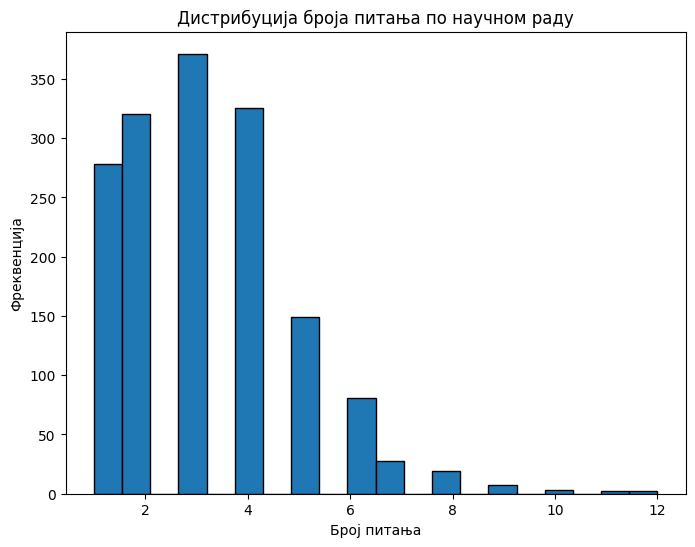

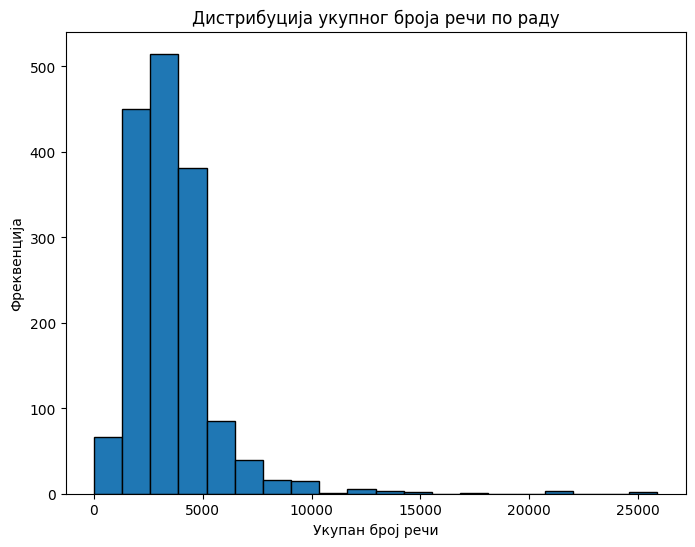

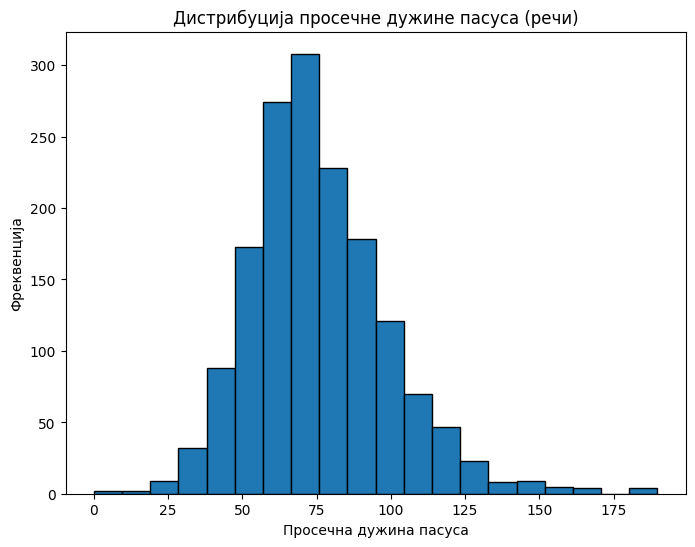

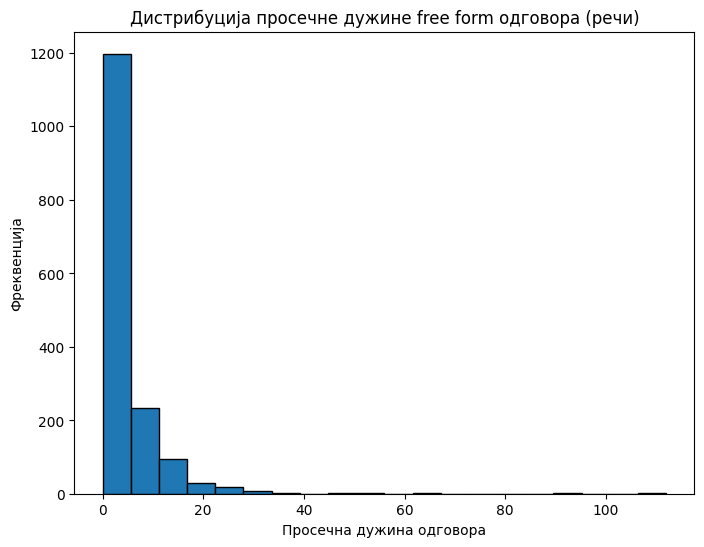

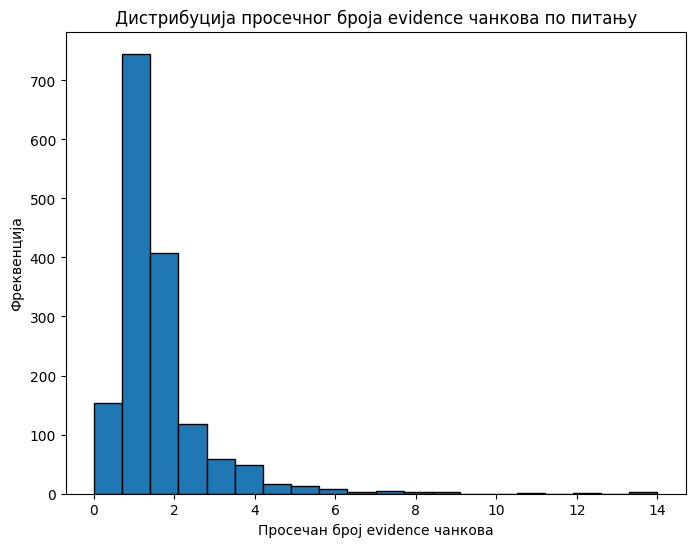

In [8]:
# %% Visualizations for detailed analysis
plt.figure(figsize=(8,6))
plt.hist(df_detailed["num_questions"], bins=20, edgecolor='black')
plt.title("Дистрибуција броја питања по научном раду")
plt.xlabel("Број питања")
plt.ylabel("Фреквенција")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df_detailed["total_words"], bins=20, edgecolor='black')
plt.title("Дистрибуција укупног броја речи по раду")
plt.xlabel("Укупан број речи")
plt.ylabel("Фреквенција")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df_detailed["avg_para_length"], bins=20, edgecolor='black')
plt.title("Дистрибуција просечне дужине пасуса (речи)")
plt.xlabel("Просечна дужина пасуса")
plt.ylabel("Фреквенција")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df_detailed["avg_free_form_length"], bins=20, edgecolor='black')
plt.title("Дистрибуција просечне дужине free form одговора (речи)")
plt.xlabel("Просечна дужина одговора")
plt.ylabel("Фреквенција")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df_detailed["avg_evidence_per_question"], bins=20, edgecolor='black')
plt.title("Дистрибуција просечног броја evidence чанкова по питању")
plt.xlabel("Просечан број evidence чанкова")
plt.ylabel("Фреквенција")
plt.show()